# **Data & Preprocessing**
*Hari 1* – Cari dataset review di Kaggle *teks yang dimiringkan*

Pilih dataset populer, misalnya:
1.   IMDB Movie Reviews
2.   Amazon Product Reviews
3.   Yelp Reviews

Item daftar
Contoh: Kaggle IMDB Dataset

Tips: download CSV, simpan di Google Drive atau Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### *Hari 2 – Inspect data*

In [10]:
import pandas as pd

# Ganti dengan path file CSV Anda
file_path = '/content/drive/MyDrive/Yusuf Putra Bintang Satria, S.Kom/My Project/Dataset/IMDB Dataset.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Cek missing value: df.isnull().sum()

Cek distribusi label (positive/negative)

In [5]:
df.isnull().sum()

,0
review,0
sentiment,0


### *Hari 3 – Bersihkan data*

Hapus missing: df.dropna(inplace=True)

Normalisasi teks: lowercase, hapus simbol

In [6]:
df.dropna(inplace=True)

In [11]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['review'] = df['review'].apply(clean_text)


### *Hari 4 – Tokenisasi & Stopword Removal*

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([w for w in word_tokenize(text) if w not in stop_words])

df['review'] = df['review'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### *Hari 5 – Visualisasi*

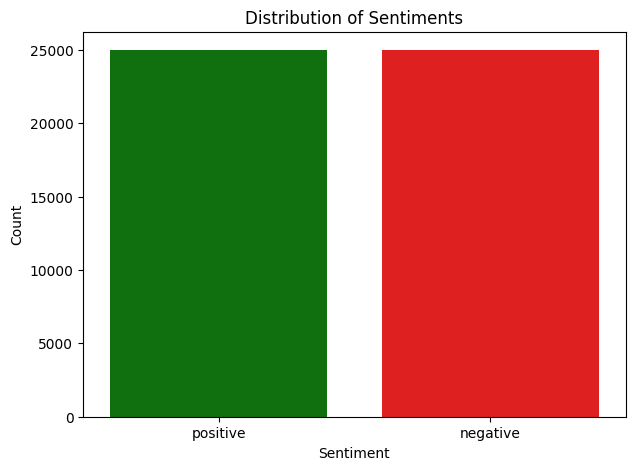

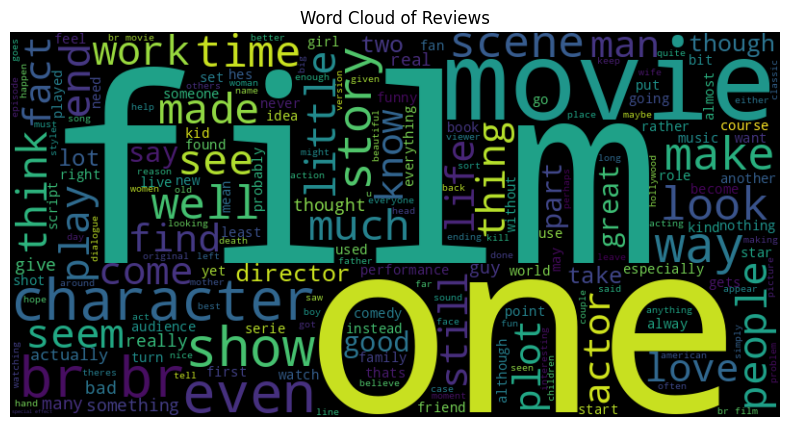

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Count label with different colors for sentiment
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', hue='sentiment', data=df, palette={'positive': 'green', 'negative': 'red'}, legend=False)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Wordcloud
text = " ".join(df['review'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

Screenshot visualisasi → nanti masuk laporan.

---



# Minggu 2 – Modeling & Evaluation
### *Hari 6 – Split dataset*

In [17]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### *Hari 7–8 – Latih model*

Bisa mulai dengan Logistic Regression atau Naive Bayes

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

### *Hari 9 – Evaluasi model*

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8618
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4361  600]
 [ 782 4257]]


*   Catat accuracy & F1 → nanti buat tabel di laporan.



---



### *Hari 10 – Simpan model*

In [20]:
import joblib
joblib.dump(model, "/content/drive/MyDrive/Yusuf Putra Bintang Satria, S.Kom/My Project/Project 1/Model/sentiment_model.pkl")

['/content/drive/MyDrive/Yusuf Putra Bintang Satria, S.Kom/My Project/Project 1/Model/sentiment_model.pkl']

# Laporan Singkat Proyek 1 – Sentiment Analysis App

## Deskripsi Singkat
Proyek ini bertujuan untuk membangun model analisis sentimen untuk mengklasifikasikan ulasan film sebagai positif atau negatif. Model ini dikembangkan melalui beberapa tahapan, mulai dari pengumpulan data, pra-pemrosesan, pemodelan, hingga evaluasi kinerja.

## Dataset
Dataset yang digunakan adalah **IMDB Movie Reviews** dari Kaggle. Dataset ini berisi 50.000 ulasan film, dengan distribusi sentimen yang seimbang: 25.000 ulasan positif dan 25.000 ulasan negatif.

## Cleaning & Preprocessing
Langkah-langkah pra-pemrosesan yang dilakukan meliputi:
1.  **Penanganan Missing Values:** Tidak ditemukan nilai yang hilang.
2.  **Normalisasi Teks:** Mengubah semua teks menjadi huruf kecil dan menghapus karakter non-alfanumerik.
3.  **Tokenisasi:** Memecah teks menjadi kata-kata individual.
4.  **Penghapusan Stopword:** Menghapus kata-kata umum (stopwords) bahasa Inggris untuk fokus pada kata-kata yang lebih bermakna.

## Model & Evaluasi
*   **Model yang Digunakan:** Sebuah Pipeline yang terdiri dari `CountVectorizer` untuk ekstraksi fitur dan `Multinomial Naive Bayes` sebagai classifier.
*   **Pembagian Data:** Dataset dibagi menjadi 80% data pelatihan dan 20% data pengujian.
*   **Metrik Kinerja:**
    *   **Accuracy:** 86.18%
    *   **F1-Score (Kelas Negatif):** 0.86
    *   **F1-Score (Kelas Positif):** 0.86
*   **Confusion Matrix:**
    ```
    [[4361  600]
     [ 782 4257]]
    ```
    (4361 True Negatives, 600 False Positives, 782 False Negatives, 4257 True Positives)

## Hasil Visualisasi
Visualisasi penting yang dihasilkan adalah:
*   **Distribusi Sentimen:** Bar plot yang menunjukkan jumlah ulasan positif dan negatif dengan warna yang berbeda (positif: hijau, negatif: merah).
*   **Word Cloud:** Visualisasi kata-kata yang paling sering muncul dalam ulasan setelah pra-pemrosesan.

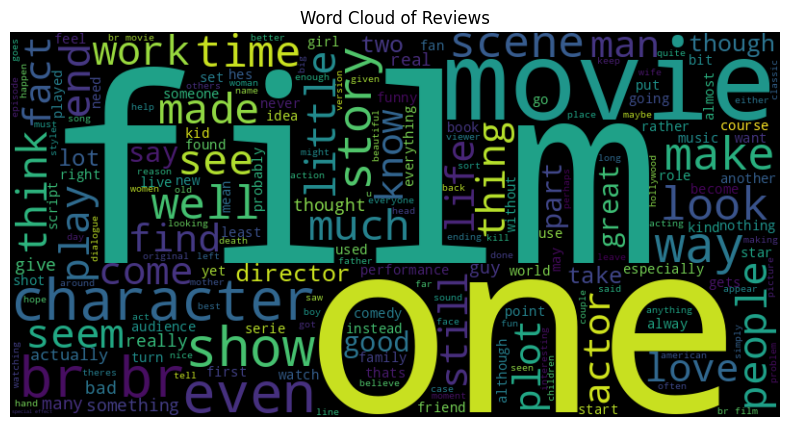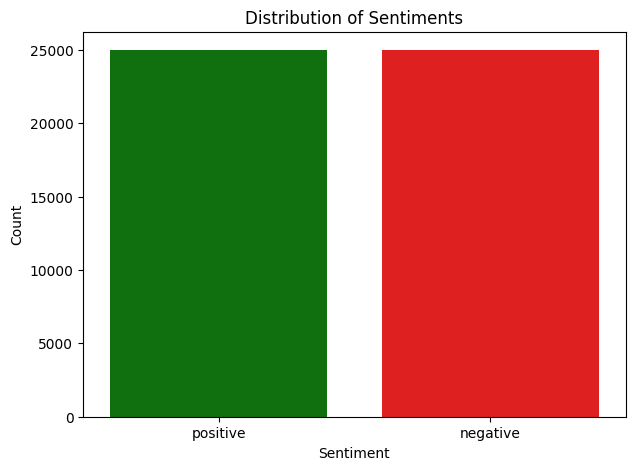

---